In [47]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sb

In [80]:
#procDir = r'G:\.shortcut-targets-by-id\13A6Oyf4JZWnw8zyZM4-rawIBB1jCWrUX\behavior01112024\processed'
procDir = r'G:\My Drive\adenosine_paper\adenosine_paper_data\behavior\0911_mrs_suramin\proc'
allExptDir_c = procDir + '\\mrs_control'
allExptDir_k = procDir + '\\mrs'
fishList_c = glob.glob(allExptDir_c + '\\*.npy')
fishList_k = glob.glob(allExptDir_k + '\\*.npy')
print(fishList_c)
print(fishList_k)

['G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\proc\\mrs_control\\ctrl.npy']
['G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\proc\\mrs\\mrs.npy']


In [82]:
pooled_ctrl = {}
pooled_ctrl['swims'] = []
pooled_ctrl['times'] = []
pooled_ket = {}
pooled_ket['swims'] = []
pooled_ket['times'] = []
for fish in fishList_c:
    data = np.load(fish,allow_pickle=True).item()
    for i in range(len(data['swims'])):
        pooled_ctrl['swims'].append(data['swims'][i])
        pooled_ctrl['times'].append(data['times'][i])
        
for fish in fishList_k:
    data = np.load(fish,allow_pickle=True).item()
    for i in range(len(data['swims'])):
        pooled_ket['swims'].append(data['swims'][i])
        pooled_ket['times'].append(data['times'][i])

In [83]:
mean_swims_cl_k = []
mean_swims_cl_c = []
for i in range(len(pooled_ket['times'])):
    frame_num = len(pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/2)
    else:
        cutoff = int(frame_num/3)
    numswims = []
    for j in range(len(pooled_ket['times'][i])):
        cl_swims = np.where(pooled_ket['times'][i][j] <= cutoff)[0]
        numswims.append(len(cl_swims))
    mean_swims_cl_k.append(np.median(numswims))
    
for i in range(len(pooled_ctrl['times'])):
    frame_num = len(pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/2)
    else:
        cutoff = int(frame_num/3)
    numswims = []
    for j in range(len(pooled_ctrl['times'][i])):
        cl_swims = np.where(pooled_ctrl['times'][i][j] <= cutoff)[0]
        numswims.append(len(cl_swims))
    mean_swims_cl_c.append(np.median(numswims))

In [86]:
acceptable_fish_k = []
accept_thresh = 0
for i in range(len(mean_swims_cl_k)):
    if(mean_swims_cl_k[i] >accept_thresh):
        acceptable_fish_k.append(i)

        
acceptable_fish_c = []
for i in range(len(mean_swims_cl_c)):
    if(mean_swims_cl_c[i] >accept_thresh):
        acceptable_fish_c.append(i)


filtered_pooled_ket = {}
filtered_pooled_ket['swims'] = []
filtered_pooled_ket['times'] = []
filtered_pooled_ctrl = {}
filtered_pooled_ctrl['swims'] = []
filtered_pooled_ctrl['times'] = []
for i in acceptable_fish_k:
    filtered_pooled_ket['swims'].append(pooled_ket['swims'][i])
    filtered_pooled_ket['times'].append(pooled_ket['times'][i])
    
for i in acceptable_fish_c:
    filtered_pooled_ctrl['swims'].append(pooled_ctrl['swims'][i])
    filtered_pooled_ctrl['times'].append(pooled_ctrl['times'][i])

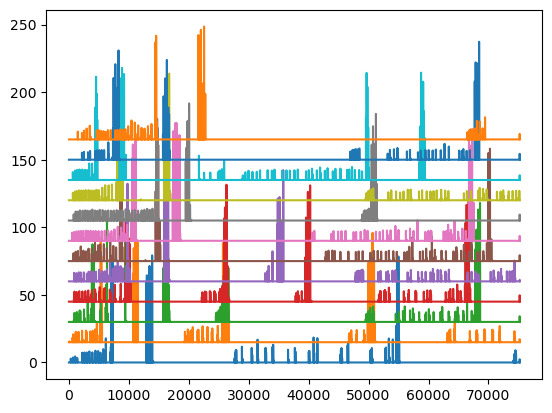

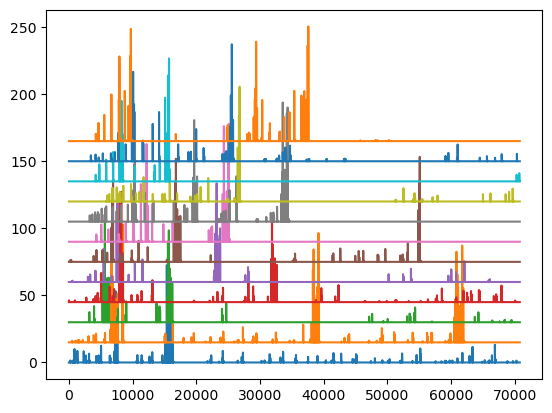

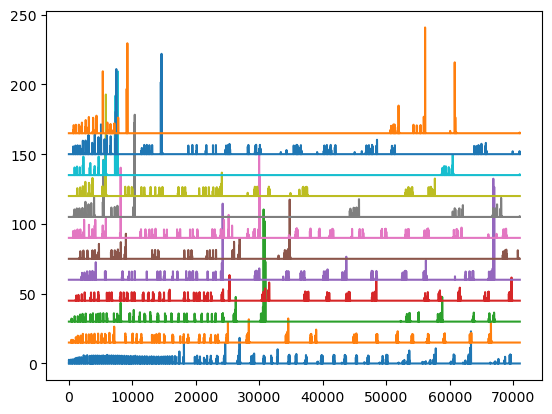

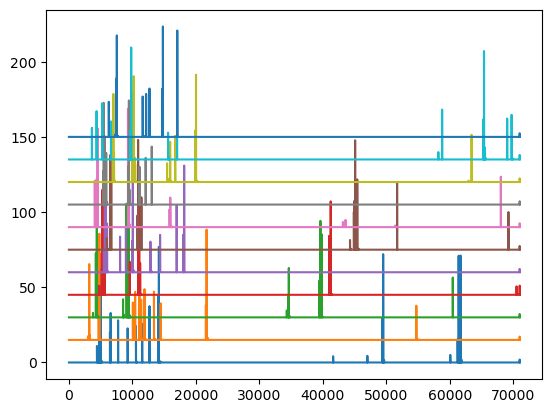

In [87]:
for i in range(len(filtered_pooled_ctrl['swims'])):
    plt.figure()
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        plt.plot(filtered_pooled_ctrl['swims'][i][j] + 15 * j)
    

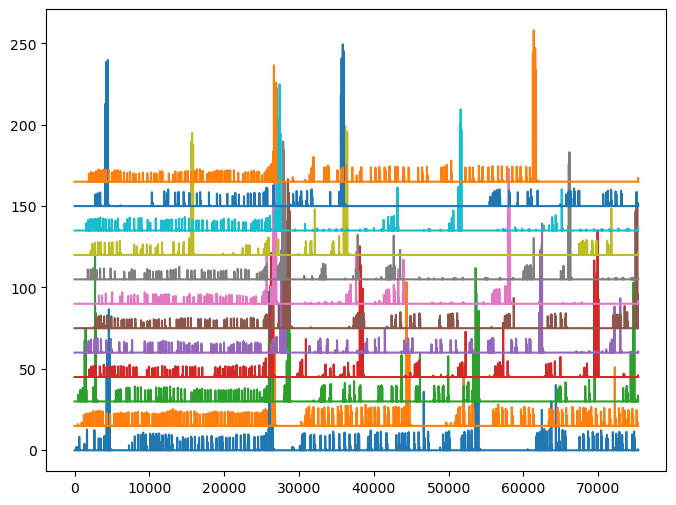

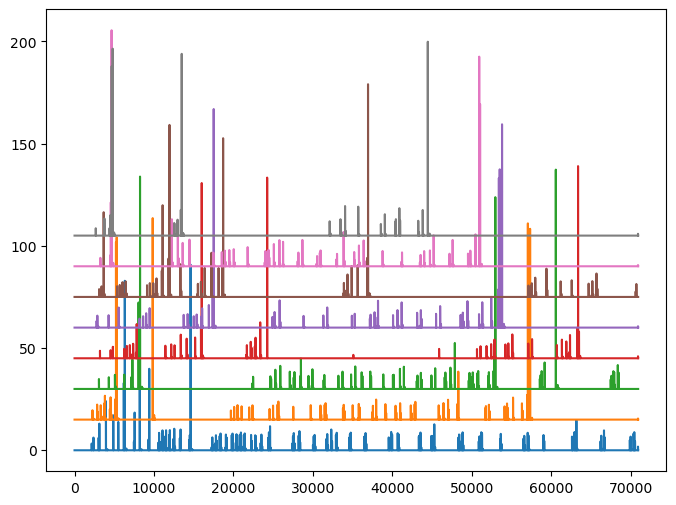

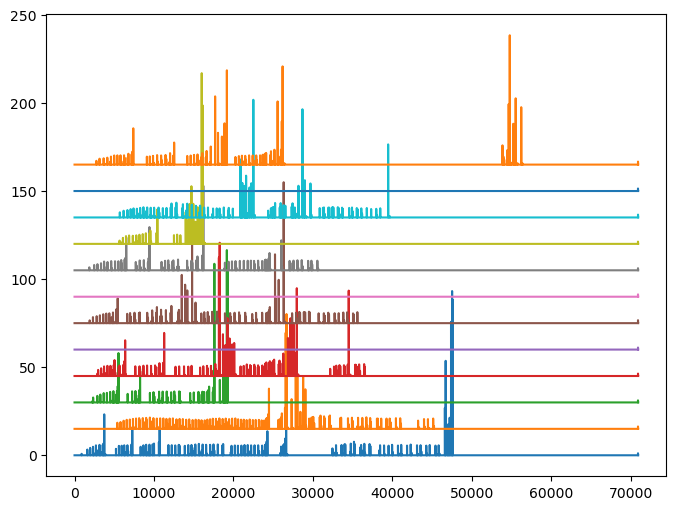

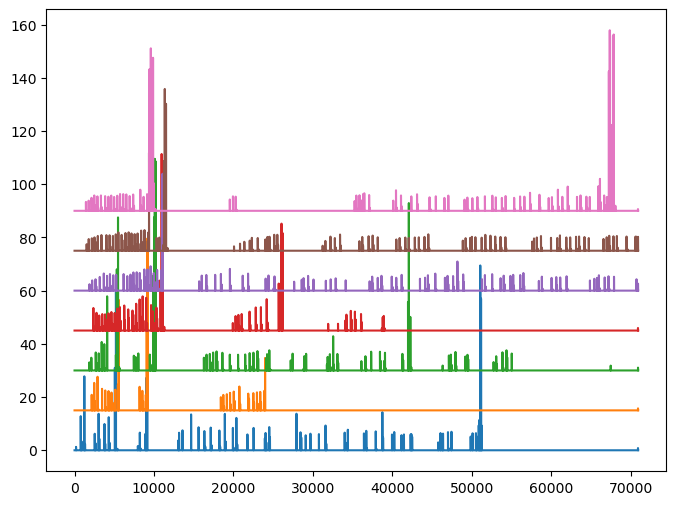

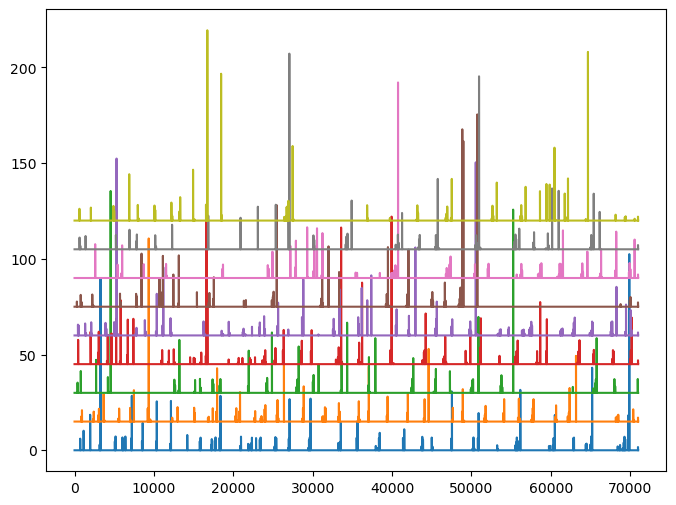

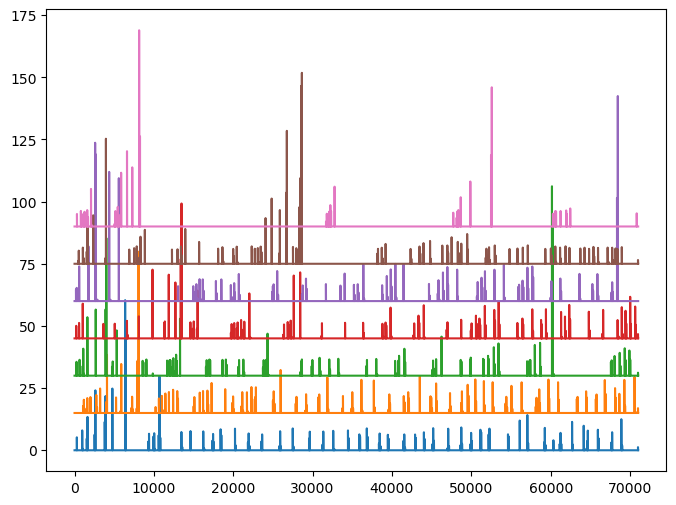

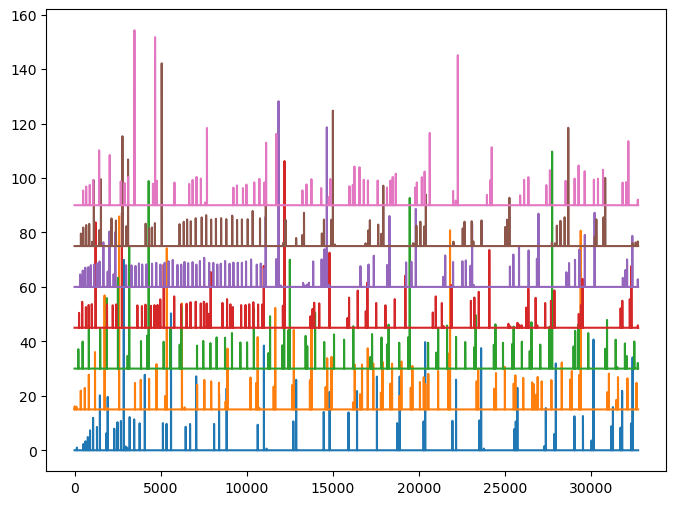

In [89]:
for i in range(len(filtered_pooled_ket['swims'])):
    plt.figure(figsize=(8,6))
    for j in range(len(filtered_pooled_ket['swims'][i])):
        plt.plot(filtered_pooled_ket['swims'][i][j] + 15 * j)
    

In [59]:
#np.save(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_ctrl.npy',filtered_pooled_ctrl)
#np.save(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_tcb2.npy',filtered_pooled_ket)

In [92]:
#filtered_pooled_ctrl = np.load(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_ctrl.npy',allow_pickle=True).item()
#filtered_pooled_ket = np.load(r'C:\Users\14076\Documents\ketamine_expts\fig2\acute\behavior_07152022\proc\filtered_tcb2.npy',allow_pickle=True).item()
for i in range(len(filtered_pooled_ctrl['swims'])):
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        maxFrame = len(filtered_pooled_ctrl['swims'][i][j])
        filtered_pooled_ctrl['times'][i][j] = np.append(filtered_pooled_ctrl['times'][i][j],maxFrame-1)
        #filtered_pooled_ctrl['swims'][i][j] = np.append(filtered_pooled_ctrl['swims'][i][j],1)x
for i in range(len(filtered_pooled_ket['swims'])):
    for j in range(len(filtered_pooled_ket['swims'][i])):
        maxFrame = len(filtered_pooled_ket['swims'][i][j])
        filtered_pooled_ket['times'][i][j] = np.append(filtered_pooled_ket['times'][i][j],maxFrame-1)
        #filtered_pooled_ket['swims'][i][j] = np.append(filtered_pooled_ket['swims'][i][j],1)

In [94]:
import seaborn as sb

In [97]:
all_mags_k = np.zeros([len(filtered_pooled_ket['swims']),])
all_vars_k = np.zeros([len(filtered_pooled_ket['swims']),])
for i in range(len(filtered_pooled_ket['swims'])):
    frame_num = len(filtered_pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 400
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_cl_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_mags = []
    for j in range(len(filtered_pooled_ket['swims'][i])):
        cl_swim_inds = np.where(filtered_pooled_ket['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ket['times'][i][j][cl_swim_inds]
        cl_mags = filtered_pooled_ket['swims'][i][j][cl_swims]
        for k in range(len(cl_mags)):
            fish_mags.append(cl_mags[k])
    all_mags_k[i] = np.mean(fish_mags)
    all_vars_k[i] = np.std(fish_mags)
    
    
all_mags_c = np.zeros([len(filtered_pooled_ctrl['swims']),])
all_vars_c = np.zeros([len(filtered_pooled_ctrl['swims']),])
for i in range(len(filtered_pooled_ctrl['swims'])):
    frame_num = len(filtered_pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_cl_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_mags = []
    for j in range(len(filtered_pooled_ctrl['swims'][i])):
        cl_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ctrl['times'][i][j][cl_swim_inds]
        cl_mags = filtered_pooled_ctrl['swims'][i][j][cl_swims]
        for k in range(len(cl_mags)):
            fish_mags.append(cl_mags[k])
    all_mags_c[i] = np.mean(fish_mags)
    all_vars_c[i] = np.std(fish_mags)


In [99]:
passive_times = {}
passive_times['passive'] = []
passive_times['fish'] = []
passive_times['condition'] = []
passive_times['swim_mag'] = []
passive_times['cl_rate'] = []
passive_times['cl_mag'] = []
passive_times['passive_cl'] = []
mean_passive = []
mean_passive_k = []
mean_passive_k_cl = []
mean_cl_rate_k = []
mean_ol_rate_k = []
mean_passive_c = []
mean_passive_c_cl = []
mean_cl_rate_c = []
mean_ol_rate_c = []
mean_cl_int_c = []
mean_cl_int_k = []
mean_ol_int_c = []
mean_ol_int_k = []
mean_ol_struggle_c = []
mean_ol_struggle_k = []
passivethresh = 5
struggle_cutoff = 2.5
for i in range(len(filtered_pooled_ket['swims'])):
    frame_num = len(filtered_pooled_ket['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff * 2
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    numswims = []
    fish_passive = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_passive_cl = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_cl_rate = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_rate = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_cl_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_int = np.zeros([len(filtered_pooled_ket['times'][i]),])
    fish_ol_struggle = np.zeros([len(filtered_pooled_ket['times'][i]),])
    for j in range(len(filtered_pooled_ket['times'][i])):
        ol_swim_inds = np.where(filtered_pooled_ket['times'][i][j] > cutoff)[0]
        cl_swim_inds = np.where(filtered_pooled_ket['times'][i][j] < cutoff)[0]
        ol_swims = filtered_pooled_ket['times'][i][j][ol_swim_inds]
        ol_swims = np.insert(ol_swims,0,cutoff)
        ol_mags = filtered_pooled_ket['swims'][i][j][ol_swims]
        cl_swims = filtered_pooled_ket['times'][i][j][cl_swim_inds]
        ol_swims2 = ol_swims[0:(len(ol_swims)-1)]
        ol_int = np.mean(filtered_pooled_ket['swims'][i][j][ol_swims])
        cl_int = np.mean(filtered_pooled_ket['swims'][i][j][cl_swims])
        cl_var = np.std(filtered_pooled_ket['swims'][i][j][cl_swims])
        ol_struggles = ol_mags[np.where(ol_mags>(all_mags_k[i] + struggle_cutoff*all_vars_k[i]))]
        isis = np.diff(ol_swims)
        isis_cl = np.diff(cl_swims)
        
        if (frame_num > 20000):
            passive_cutoff = passivethresh*300
        else:
            passive_cutoff = passivethresh*90
        isis_cl_p = isis_cl[np.where(isis_cl>passive_cutoff)]
        
        if (len(isis)==0):
            passivetime = ol_flength
        else:
            isis = isis[np.where(isis>passive_cutoff)]
            passivity_onset_inds = np.where(isis>passive_cutoff)
            passivetime = np.sum(isis)
        if (len(isis_cl)==0):
            passivetime_cl = cutoff
        else:
            firstcl = cl_swims[0]
            lastcl = cl_swims[-1]
            passivetime_cl = np.sum(isis_cl_p)
        
        passive_times['passive'].append(passivetime/ol_flength)
        passive_times['fish'].append(i)
        passive_times['condition'].append('ket')
        passive_times['cl_rate'].append(len(cl_swim_inds))
        passive_times['passive_cl'].append(passivetime_cl/cutoff)
        passive_times['swim_mag'].append(ol_int)
        fish_passive[j] = passivetime/ol_flength
        fish_passive_cl[j] = passivetime_cl/cl_len
        fish_cl_rate[j] = len(cl_swim_inds)/cl_len
        fish_ol_rate[j] = len(ol_swim_inds)/ol_len
        fish_ol_int[j] = np.mean(ol_int)
        fish_cl_int[j] = np.mean(cl_int)
        fish_ol_struggle[j] = len(ol_struggles)/len(ol_swim_inds)
    mean_passive_k.append(np.mean(fish_passive))
    mean_passive_k_cl.append(np.mean(fish_passive_cl))
    mean_cl_rate_k.append(np.mean(fish_cl_rate))
    mean_ol_rate_k.append(np.mean(fish_ol_rate))
    mean_cl_int_k.append(np.mean(fish_cl_int))
    mean_ol_int_k.append(np.mean(fish_ol_int))
    mean_ol_struggle_k.append(np.mean(fish_ol_struggle))
mean_passive.append(mean_passive_k)
for i in range(len(filtered_pooled_ctrl['swims'])):
    frame_num = len(filtered_pooled_ctrl['swims'][i][0])
    if (frame_num > 20000):
        cutoff = int(frame_num/3)
        ol_flength = cutoff * 2
        cl_len = cutoff / 300
        ol_len = cl_len*2
    else:
        cutoff = int(frame_num/3)
        ol_flength = cutoff*2
        cl_len = cutoff / 90
        ol_len = cl_len*2
    
    numswims = []
    fish_passive = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_passive_cl = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_cl_rate = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_rate = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_cl_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_int = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    fish_ol_struggle = np.zeros([len(filtered_pooled_ctrl['times'][i]),])
    for j in range(len(filtered_pooled_ctrl['times'][i])):
        ol_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] > cutoff)[0]
        ol_swims = filtered_pooled_ctrl['times'][i][j][ol_swim_inds]
        ol_swims = np.insert(ol_swims,0,cutoff)
        ol_mags = filtered_pooled_ctrl['swims'][i][j][ol_swims]
        cl_swim_inds = np.where(filtered_pooled_ctrl['times'][i][j] < cutoff)[0]
        cl_swims = filtered_pooled_ctrl['times'][i][j][cl_swim_inds]
        ol_int = np.mean(filtered_pooled_ctrl['swims'][i][j][ol_swims])
        cl_int = np.mean(filtered_pooled_ctrl['swims'][i][j][cl_swims])
        cl_var = np.std(filtered_pooled_ctrl['swims'][i][j][cl_swims])
        ol_struggles = ol_swims[np.where(ol_mags>(all_mags_c[i] + struggle_cutoff * all_vars_c[i]))]
        isis = np.diff(ol_swims)
        isis_cl = np.diff(cl_swims)
        if (frame_num > 20000):
            passive_cutoff = passivethresh*300
        else:
            passive_cutoff = passivethresh*90
        
        isis_cl_p = isis_cl[np.where(isis_cl>passive_cutoff)]
        if (len(isis_cl)==0):
            passivetime_cl = cutoff
        else:
            firstcl = cl_swims[0]
            lastcl = cl_swims[-1]
            passivetime_cl = np.sum(isis_cl_p)
       
        if (len(isis)==0):
            passivetime = ol_flength
        else:
            isis = isis[np.where(isis>passive_cutoff)]
            passivetime = np.sum(isis)
        passive_times['passive'].append(passivetime/ol_flength)
        passive_times['fish'].append(i)
        passive_times['condition'].append('ctrl')
        passive_times['cl_rate'].append(len(cl_swim_inds))
        passive_times['passive_cl'].append(passivetime_cl/cutoff)
        passive_times['swim_mag'].append(ol_int)
        fish_passive[j] = passivetime/ol_flength
        fish_passive_cl[j] = passivetime_cl/cutoff*100
        fish_cl_rate[j] = len(cl_swim_inds)/cl_len
        fish_ol_rate[j] = len(ol_swim_inds)/ol_len
        fish_ol_int[j] = np.mean(ol_int)
        fish_cl_int[j] = np.mean(cl_int)
        fish_ol_struggle[j] = len(ol_struggles)/len(ol_swims)
    mean_passive_c.append(np.mean(fish_passive))
    mean_passive_c_cl.append(np.mean(fish_passive_cl))
    mean_cl_rate_c.append(np.mean(fish_cl_rate))
    mean_ol_rate_c.append(np.mean(fish_ol_rate))
    mean_cl_int_c.append(np.mean(fish_cl_int))
    mean_ol_int_c.append(np.mean(fish_ol_int))
    mean_ol_struggle_c.append(np.mean(fish_ol_struggle))
mean_passive.append(mean_passive_c)

C:\Users\kodan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kodan\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\kodan\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\kodan\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\kodan\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [101]:
summary = {}
summary['condition'] = []
summary['passive'] = []
summary_cl = {}
summary_cl['condition'] = []
summary_cl['passive'] = []
summary_cl['rate'] = []
summary_cl['int_cl'] = []
summary_cl['int_ol'] = []
summary_cl['rate_ol'] = []
summary_cl['struggle_rate'] = []
passive_cl_ol = {}
passive_cl_ol['condition'] = []
passive_cl_ol['passive'] = []
for i in range(len(mean_passive_c)):
    summary['condition'].append('control')
    summary['passive'].append(mean_passive_c[i])
    summary_cl['condition'].append('control')
    summary_cl['passive'].append(mean_passive_c_cl[i])
    summary_cl['rate'].append(mean_cl_rate_c[i])
    summary_cl['rate_ol'].append(mean_ol_rate_c[i])
    summary_cl['int_cl'].append(mean_cl_int_c[i])
    summary_cl['int_ol'].append(mean_ol_int_c[i])
    summary_cl['struggle_rate'].append(mean_ol_struggle_c[i])
    passive_cl_ol['passive'].append(mean_passive_c_cl[i])
    passive_cl_ol['condition'].append('cl')
for i in range(len(mean_passive_k)):
    summary['condition'].append('ketamine')
    summary['passive'].append(mean_passive_k[i])
    summary_cl['condition'].append('ketamine')
    summary_cl['passive'].append(mean_passive_k_cl[i])
    summary_cl['rate'].append(mean_cl_rate_k[i])
    summary_cl['rate_ol'].append(mean_ol_rate_k[i])
    summary_cl['int_cl'].append(mean_cl_int_k[i])
    summary_cl['int_ol'].append(mean_ol_int_k[i])
    summary_cl['struggle_rate'].append(mean_ol_struggle_k[i])

In [103]:
from scipy.stats import mannwhitneyu

C:\Users\kodan\AppData\Local\Temp\ipykernel_32284\840506934.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sb.barplot(data=summary, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

<Axes: xlabel='condition', ylabel='share passive time'>

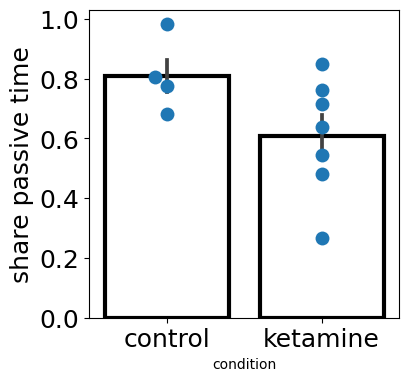

In [105]:
plt.figure(figsize=(4,4))

plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=summary, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=summary, x="condition",y="passive",size=10)
#plt.savefig(r'G:\My Drive\20230913_suramin\proc\passivity.svg',dpi=300)

In [107]:
pd.DataFrame(summary).to_csv(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS8_supplement_for_clado\revision\mrs_new.csv')

In [83]:
pd.DataFrame(summary_cl).to_csv(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS4\revision\hpmca_cl_stats.csv')

In [51]:
passive_cl_ol = {}
passive_cl_ol['condition'] = []
passive_cl_ol['passive'] = []
for i in range(len(mean_passive_c_cl)):
    passive_cl_ol['passive'].append(mean_passive_c_cl[i])
    passive_cl_ol['condition'].append('ctrl_cl')
for i in range(len(mean_passive_k_cl)):
    passive_cl_ol['passive'].append(mean_passive_k_cl[i])
    passive_cl_ol['condition'].append('clado_cl')
for i in range(len(mean_passive_c)):
    passive_cl_ol['passive'].append(mean_passive_c[i]*100)
    passive_cl_ol['condition'].append('ol')
for i in range(len(mean_passive_k)):
    passive_cl_ol['passive'].append(mean_passive_k[i]*100)
    passive_cl_ol['condition'].append('clado_ol')

In [49]:
summary_stats = {}
summary_stats['cl_passivity'] = []
summary_stats['ol_passivity'] = []
summary_stats['cl_vigor'] = []
summary_stats['ol_vigor'] = []
for i in range(len(mean_passive_c)):
    summary_stats['cl_passivity'].append(mean_passive_c_cl[i])
    summary_stats['ol_passivity'].append(mean_passive_c[i]*100)
    summary_stats['cl_vigor'].append(summary_cl['int_cl'][i])
    summary_stats['ol_vigor'].append(summary_cl['int_ol'][i])

In [30]:
pd.DataFrame(summary_stats).to_csv(r'G:\My Drive\adenosine_paper_figures\Fig3\clado_summary.csv')#

C:\Users\kodan\AppData\Local\Temp\ipykernel_11276\1899491065.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sb.barplot(data=passive_cl_ol, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<Axes: xlabel='condition', ylabel='share passive time'>

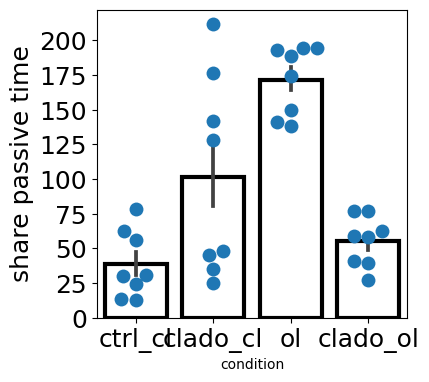

In [52]:
plt.figure(figsize=(4,4))

plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=passive_cl_ol, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=passive_cl_ol, x="condition",y="passive",size=10)

#plt.savefig(r'G:\My Drive\20230913_suramin\proc\passivity.svg',dpi=300)

In [29]:
pd.DataFrame(passive_cl_ol).to_csv(r'G:\My Drive\adenosine_paper_figures\Fig3\cl_ol_passivity_clado2.csv')

In [270]:
#pd.DataFrame(mean_passive_k).to_csv(r'G:\My Drive\adenosine_paper_data\behavior\caffeine\caf_cl_ol_passivity.csv')

In [260]:
swim_vigor = {}
swim_vigor

{}

<Axes: ylabel='share passive time'>

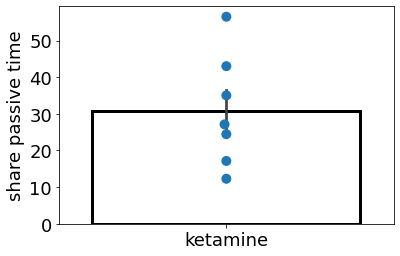

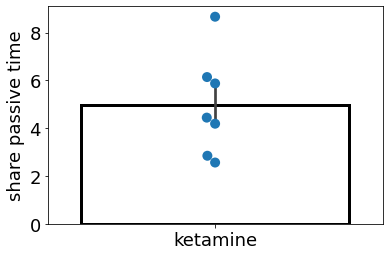

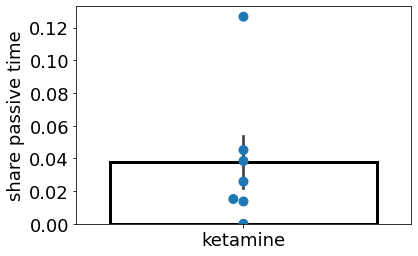

In [237]:
plt.figure()
plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=summary_cl, x="condition",y="passive", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=summary_cl, x="condition",y="passive",size=10)
plt.figure()
plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=summary_cl, x="condition",y="int_ol", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=summary_cl, x="condition",y="int_ol",size=10)
plt.figure()
plt.ylabel('share passive time',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.barplot(data=summary_cl, x="condition",y="struggle_rate", edgecolor=(0,0,0,1),linewidth = 3,facecolor=(0,0,0,0),ci=68)
sb.swarmplot(data=summary_cl, x="condition",y="struggle_rate",size=10)

In [238]:
#pd.DataFrame(summary_cl).to_csv(r'C:\Users\14076\Documents\propanolol\proc\cl_ol_passivity_prop1.csv')

[]

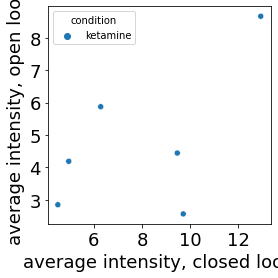

In [239]:
plt.figure(figsize=(4,4))
plt.ylabel('average intensity, open loop',fontsize=18)
plt.xlabel('average intensity, closed loop',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sb.scatterplot(data=summary_cl, x="int_cl",y="int_ol",hue = "condition")
#plt.plot(np.linspace(0,15),np.linspace(0,15),'--',color = [0.5,0.5,0.5,1])
plt.plot()

In [16]:
pd.DataFrame(mean_passive_c).to_csv(r'G:\My Drive\adenosine_paper_data\behavior\20230913_suramin\proc\control.csv')
pd.DataFrame(mean_passive_k).to_csv(r'G:\My Drive\adenosine_paper_data\behavior\20230913_suramin\proc\suramin.csv')

In [68]:
pd.DataFrame(summary_cl).to_csv(procDir + '\\closed_loop_stats_ctrl_caf.csv')